In [1]:
import numpy as np
import matplotlib.pyplot as plt

b)


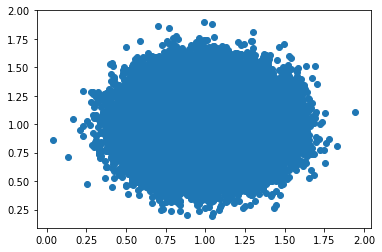

c)
Für x = -3.0:
	 Numerisch: 	y = -1.99858 +/- 0.631518.
	 Analytisch: 	y = -2.0 +/- 0.632456.

Für x = 0.0:
	 Numerisch: 	y = 0.999631 +/- 0.199929.
	 Analytisch: 	y = 1.0 +/- 0.2.

Für x = 3.0:
	 Numerisch: 	y = 3.99784 +/- 0.633901.
	 Analytisch: 	y = 4.0 +/- 0.632456.



In [20]:
def f(x, a0, a1):
    return a0 + x* a1

ana_y =np.array([[-3, 0, 3],[-2, 1, 4], [0.632456, 0.2, 0.632456]]).T
x = [-3, 0, 3]
a0 = np.random.normal(1.0, 0.2, 10**5)
a1 = np.random.normal(1.0, 0.2, 10**5)

print("b)")
plt.scatter(a0, a1)
plt.show()
print("c)")
for i in ana_y:
    y = f(i[0], a0, a1)
    y_mean= y.mean() 
    y_std = y.std()
    print(f"Für x = {i[0]}:\n\t Numerisch: \ty = {y_mean:.6} +/- {y_std:.6}.\n\t Analytisch: \ty = {i[1]} +/- {i[2]}.\n")
    
None